In [11]:
%matplotlib inline
import time
import torch
import torchvision
from torchvision import transforms
from d2l import torch as d2l

In [12]:
class Fashion():

    def __init__(self, batch_size=64, resize=(28, 28)):
        self.batch_size = batch_size
        trans = transforms.Compose([transforms.Resize(resize), transforms.ToTensor()])
        self.train = torchvision.datasets.FashionMNIST(root='../data', train=True, transform=trans, download=True)
        self.val = torchvision.datasets.FashionMNIST(root='../data', train=False, transform=trans, download=True)

    def text_labels(self, indices):
        """Given an array of indices, return an array of their labels"""
        labels = ['t-shirt', 'trouser', 'pullover', 'dress', 'coat',
              'sandal', 'shirt', 'sneaker', 'bag', 'ankle boot']
        return [labels[int(i)] for i in indices]
    
    def get_dataloader(self, train):
        """Uses the default dataloader from pytorch"""
        data = self.train if train else self.val
        return torch.utils.data.DataLoader(data, self.batch_size, shuffle=train, num_workers=4)
    
    def val_dataloader(self):
        return self.get_dataloader(False)

    def train_dataloader(self):
        return self.get_dataloader(True)
    
    def visualize(self, batch, nrows=1, ncols=8, labels=[]):
        X, y = batch
        if not labels:
            labels = self.text_labels(y)
            # squeeze returns a tensor with all specified dimensions of input of size 1 removed
        d2l.show_images(X.squeeze(1), nrows, ncols, titles=labels)

In [13]:
data = Fashion(resize=(32, 32))
len(data.train), len(data.val)

(60000, 10000)

In [14]:
data.train[0][0].shape

torch.Size([1, 32, 32])

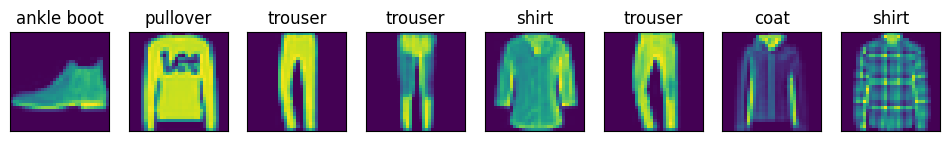

In [15]:
batch = next(iter(data.val_dataloader()))
data.visualize(batch)

In [ ]:
class Classifier: 

    def validation_step(self, batch):
        